## Object detection and segmentation using mask_rcnn

In this lab, we are going to recapitulate what object detection and segmentation is, and use mask_rcnn to detect and segment some objects inside images! :D

If you need to revisit what object detection and segmentation are, please take a look at the object detection and segmentation notebook first. It is located inside the same folder as this notebook you are reading right now :)

### Mask R-CNN

In this lab, we will use the [mask RCNN framework](https://arxiv.org/abs/1703.06870) to perform object detection and segmentation. It is a simple, flexible, and general framework for object instance segmentation [presented by a group of researchers inside the Facebook research division](https://research.fb.com/publications/mask-r-cnn/).

Basically, Mask RCNN can separate different objects in an image or a video. You give it an image, it gives you the object bounding boxes, classes, and masks. 

In [7]:
# First of all, we will clone the https://github.com/matterport/Mask_RCNN, which is a python implementation of the framework.
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


Next, we need to run the following command because we are using TensorFlow 2.0, and this implementation is written using an old version of TensorFlow, so we need to upgrade that code so it works with the TensorFlow version we are using.

In [8]:
!tf_upgrade_v2 --intree Mask_RCNN --inplace

TensorFlow 2.0 Upgrade Script
-----------------------------
Converted 22 files
Detected 0 issues that require attention
--------------------------------------------------------------------------------


Make sure to read the detailed log 'report.txt'



2020-04-30 14:27:43.310386: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_101.dll


### Loading Mask_RCNN

The code below loads the framework. Here we are importing the required libraries, importing the Mask RCNN itself, downloading the pre-trained weights that were obtained by training the neural networks behind the framework in [MS coco](http://cocodataset.org/#home), which is a large-scale object detection, segmentation, and captioning dataset consisting of more than 300k images.

In [9]:
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import os 

os.chdir('Mask_RCNN/samples')

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


Next, let's, sub-class the CocoConfig class and override the GPU count and the number of images per GPU. You can play around with it and change other configurations as well.

In [10]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

Now let's create the model and load the pre-trained weights we just downloaded

In [11]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Next, let's load some classes of the coco dataset.

In [13]:
classes =  tuple(element.strip() for element in open('../../classes.txt', 'r'))

Now we can finally load some images and try to perform the detection and segmentation.

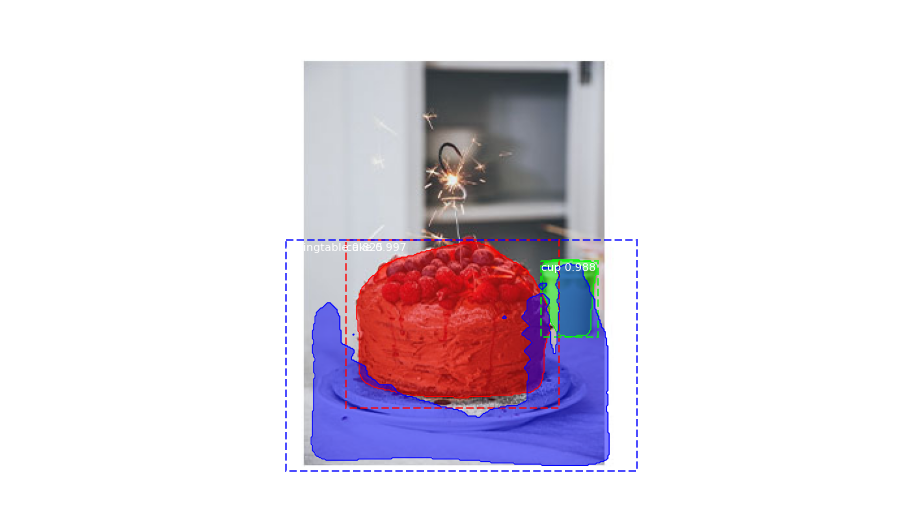

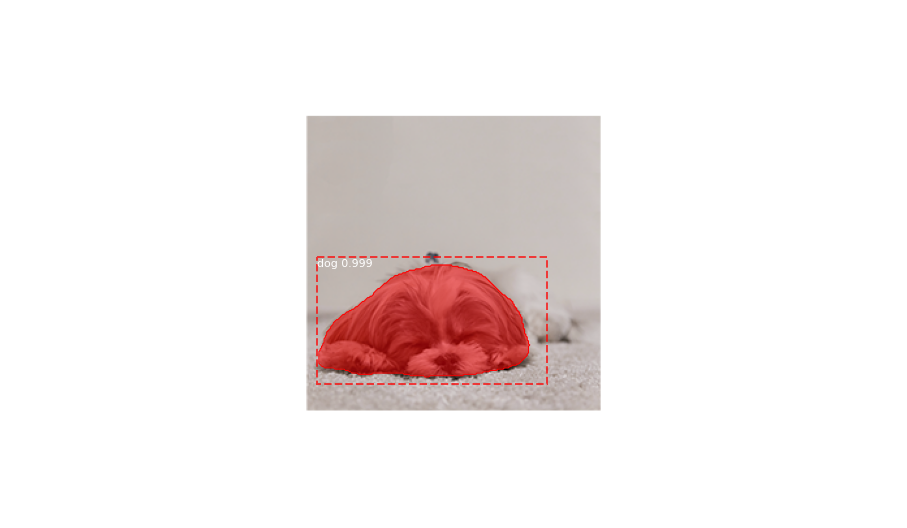

In [16]:
path = '../../images/this-cake-is-also-a-lie.jpg'
image = skimage.io.imread(path)

# Run detection
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            classes, r['scores'])

path = '../../images/cute-dog.jpg'
image = skimage.io.imread(path)

# Run detection
results = model.detect([image], verbose=0)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            classes, r['scores'])